In [148]:
# importing the packages
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning, RuntimeWarning))

In [149]:
# reading the data
df = pd.read_csv("ratings_Electronics.csv")

In [150]:
# assigning the columns to the data
df.columns= ['userID','prodID', 'ratings','timestamp']

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
userID       object
prodID       object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [158]:
df.isnull().sum()

userID     0
prodID     0
ratings    0
dtype: int64

The data has 7824481 not null entries </br>
Userid and prodid is of string type

In [152]:
df.head()

,userID,prodID,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [153]:
df = df.drop(['timestamp'], axis =1)

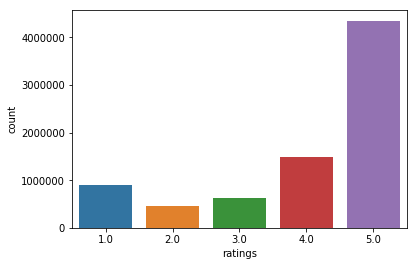

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['ratings'])
plt.show()

In [110]:
df['ratings'].unique()

array([5., 1., 3., 2., 4.])

In [111]:
df['ratings'].value_counts()

5.0    4347540
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

The ratings are between 1 to 5 <br>
Most of the users have given 5 ratings to the product . It means services and products are generally good.

In [112]:
# no of unique users
df['userID'].nunique()

4201696

In [159]:
# no of unique product
df['prodID'].nunique()

476001

Lets consider only those user data who have rated more than 50 products

In [114]:
counts = df['userID'].value_counts()

In [115]:
dffinal = df[df['userID'].isin(counts[counts > 50].index)]

In [116]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122171 entries, 117 to 7824443
Data columns (total 3 columns):
userID     122171 non-null object
prodID     122171 non-null object
ratings    122171 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.7+ MB


In [117]:
dffinal['userID'].nunique()

1466

In [118]:
dffinal['prodID'].nunique()

47155

After filtering , we are left with 1466 users which are not even 1% of the total users and 47155 products

<b>SVD MODEL</b>

In [119]:
# pivot table of users and products
R_df = dffinal.pivot(index = 'userID', columns = 'prodID', values = 'ratings').fillna(0)

In [120]:
R_df.head()

prodID,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
# top 5 recommendations function.These recommendation are not user specific . These recommendations are same for all users
 
def TopRecommendation(prodkey , userkey, data):
    Product_data_group = data.groupby(prodkey).agg({userkey:'count'}).reset_index()
    Product_data_group.rename(columns={userkey:'score'},inplace =True)
    dfsort= Product_data_group.sort_values(['score',prodkey] ,ascending=False).reset_index()
    dfsort['Rank']= dfsort['score'].rank(ascending=0,method='first')
    print(dfsort.head())
    
    

In [121]:
TopRecommendation('prodID' , 'userID',Product_data_group)

    index      prodID  score  Rank
0  308397  B0074BW614  18244   1.0
1  429571  B00DR0PDNE  16454   2.0
2  327307  B007WTAJTO  14172   3.0
3  102803  B0019EHU8G  12285   4.0
4  296624  B006GWO5WK  12226   5.0


Lets predict all the raings using svd

In [27]:
from scipy.sparse.linalg import svds

In [28]:
U, sigma, Vt = svds(R_df, k = 50)

In [29]:
sigma = np.diag(sigma)

In [30]:
sigma

array([[ 66.02615725,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  66.14923261,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  66.42594802, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 106.66806285,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        119.47759792,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 181.5107964 ]])

In [31]:
all_users_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [32]:
all_users_predicted_ratings = pd.DataFrame(all_users_predicted_ratings, columns = R_df.columns)

In [33]:
all_users_predicted_ratings.head()

prodID,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.001588,0.002451,-0.035895,0.004397,0.006706,0.021698,0.000436,0.008206,0.005558,-0.002057,...,0.000167,-0.058767,0.001375,-0.123896,0.025795,0.015849,0.002735,-0.176885,0.005937,-0.012155
1,-0.011001,0.000095,0.109788,0.010875,-0.003261,0.063178,-0.000852,0.016883,-0.002354,0.026892,...,-0.000023,0.010536,0.001531,0.021341,-0.041795,0.004579,0.002491,-0.026376,-0.018861,0.039145
2,-0.002794,-0.007663,0.007355,0.005759,-0.003735,-0.002737,0.007006,-0.007418,-0.002495,0.005797,...,-0.001553,-0.042050,0.000247,-0.053062,0.018583,-0.005048,-0.002397,0.078739,-0.116666,0.002829
3,0.011624,-0.006947,-0.011842,-0.001235,0.002217,-0.005592,-0.001605,0.002655,0.001673,0.001937,...,0.000576,-0.007289,0.000048,-0.047540,0.022800,0.006261,0.003486,0.005810,-0.017581,-0.025673
4,-0.002654,0.011595,0.020182,0.009237,0.005416,0.016867,0.003852,0.003173,0.005134,0.018685,...,0.000205,0.020602,0.000892,-0.022049,-0.012444,0.001050,0.000947,-0.021427,0.011899,0.013891


In [34]:
# top 5 user specific recommendations
def recommend_movies(userID, Product_data_group , n , R_df):
    uid= userID-1
    rtngs = R_df.iloc[uid].sort_values(ascending=False)
    predict = Product_data_group.iloc[uid].sort_values(ascending=False)
    temp =pd.concat([rtngs, predict],axis=1)
    temp.index.name ='Recommended Product ID'
    temp.columns=['UserRatings', 'PredictedRatings']
    temp = temp.sort_values(['PredictedRatings'],ascending=False)
    temp= temp.loc[temp['UserRatings']==0]
    print(temp[0:n])
    

In [35]:
 recommend_movies(6, all_users_predicted_ratings , 5, R_df  )

                        UserRatings  PredictedRatings
Recommended Product ID                               
B00829TIEK                      0.0          2.025133
B008DWCRQW                      0.0          1.167095
B00HFRWWAM                      0.0          0.697892
B00BOHNYTW                      0.0          0.653450
B004CLYEFK                      0.0          0.643887


In [36]:
# checking the accuracy
def testAccuracy(R_df,all_users_predicted_ratings):
    rmse_df=pd.concat([R_df.mean(),all_users_predicted_ratings.mean()],axis=1)
    rmse_df.columns=['Actual','Predict']
    rmse=round((((rmse_df.Actual-rmse_df.Predict)**2).mean()**.5),5)
    print(rmse)

In [37]:
testAccuracy(R_df,all_users_predicted_ratings)

0.00285


<b>KNNwithMeans</b>

In [82]:
#since KNNwithMeans has highly insentive, hence furthur decreased the data set by considering only those products
#which are rated by atleast 5 users
data = dffinal.groupby('prodID').agg({'userID':'count'}).sort_values(by ='userID',ascending=False).reset_index()
data = data[data['userID']>5]

In [83]:
dataf =dffinal[dffinal['prodID'].isin(data['prodID'])]

In [97]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57583 entries, 6146 to 7824220
Data columns (total 3 columns):
userID     57583 non-null object
prodID     57583 non-null object
ratings    57583 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.8+ MB


##### from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [86]:
data = Dataset.load_from_df(dataf[['userID', 'prodID', 'ratings']], reader)

In [91]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=123)

In [92]:
# USing item item similarity in KNNwithMeans
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': False})
algo.fit(trainset)


Computing the pearson similarity matrix...
Done computing similarity matrix.


In [93]:
# Evalute on test set
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 0.9954


0.995434476511958

In [94]:
# convert results to dataframe
test_pred_df = pd.DataFrame(test_pred)
test_pred_df["was_impossible"] = [x["was_impossible"] for x in test_pred_df["details"]]

In [95]:
len(test_pred_df.loc[test_pred_df.was_impossible])

1

In [96]:
test_pred_df.loc[test_pred_df.was_impossible].head()

,uid,iid,r_ui,est,details,was_impossible
375,A3MV1KKHX51FYT,B0011ZH0BK,5.0,4.290587,"{'was_impossible': True, 'reason': 'User and/o...",True


In [100]:
# predictng the ratings .Here we have furthur descrease the data as KNNwithmeans is very time consuming.
testset_new = trainset.build_anti_testset()
predictions = algo.test(testset_new[:30000])
predictions_df = pd.DataFrame([[x.uid,x.est,x.iid] for x in predictions])
predictions_df.columns = ["userId","est_rating","prodid"]
predictions_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)


In [123]:
predictions_df.head()

,userId,est_rating,prodid
4444,AONUCJBC85BL,5.0,B001MSU1FS
4453,AONUCJBC85BL,5.0,B005KQ2O26
4463,AONUCJBC85BL,5.0,B00D50UNRM
4472,AONUCJBC85BL,5.0,B001FVI91U
4479,AONUCJBC85BL,5.0,B005J31BCO


In [124]:
predictions_df['prodid'].nunique()

4461

In [125]:
predictions_df['userId'].nunique()

7

In [133]:
# gettng the  top 5 non user specific recommendations
TopRecommendation('prodid' , 'userId',predictions_df)

   index      prodid  score  Rank
0   4460  B00L3YHF6O      7   1.0
1   4459  B00L26YDA4      7   2.0
2   4458  B00L2442H0      7   3.0
3   4457  B00L21HC7A      7   4.0
4   4456  B00KYMCJF8      7   5.0


In [146]:
# gettng the  top 5  user specific recommendations
def TopRecUserSpc(userId , data):
    temp = data[data['userId'] ==userId]
    temp = temp.sort_values(by = 'est_rating' , ascending=False)
    print(temp.head())
    

In [147]:
TopRecUserSpc('AONUCJBC85BL' , predictions_df )

            userId  est_rating      prodid
4444  AONUCJBC85BL         5.0  B001MSU1FS
7664  AONUCJBC85BL         5.0  B000Q85WRC
7595  AONUCJBC85BL         5.0  B0078AFGW2
7604  AONUCJBC85BL         5.0  B00AANQLRI
7630  AONUCJBC85BL         5.0  B00D96BMV8


<b>CONCLUSION </b><br>
Clearly we can see that SVD(model based approach) is higly effective than KNNwithMeans .SVD divides the data into 3 matrices ,
user matrix, item matrix  and latent factor matrix . After that the dot product is done to obtain all the raings .
But one disdavantage of SVD is that there is no explanation for the predictions.
